In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Latex, HTML, Math, display

# PW4 - Klassische Mechanik

## Gleichmäßig beschleunigte Bewegung

### Grundlagen
gleichförmig beschleunigte Bewegung
Momentangeschwindigkeit: $$v(t) = at + v_0$$ 
Bahnkurve: $$x(t) = \frac{a}{2}t^2 + v_0 t + x_0$$ 

auf einen Massepunkt wirkende Kraft: $$\vec{F} = m \vec{a}$$ 

gleichförmige Kreisbewegung
Winkelgeschwindigkeit: $$\omega = \lim_{\Delta t \to 0} \frac{\Delta \varphi}{\Delta t} = \frac{\mathrm{d}\varphi}{\mathrm{d}t} = \dot{\varphi}$$ 
Bahngeschwindigkeit: $$\vec{v} = \frac{\mathrm{d}\vec{r}}{\mathrm{d}t} = \vec{\omega} \times \vec{r}$$ 

Gleireibungskraft: $$F_{\mathrm{GR}} = \mu_{\mathrm{G}} F_{\mathrm{N}}$$ 

Ortsvektor des Schwerpunkts: $$\vec{R} = \frac{\sum_i \vec{r}_i m_i}{\sum_i m_i}$$


<IPython.core.display.Latex object>

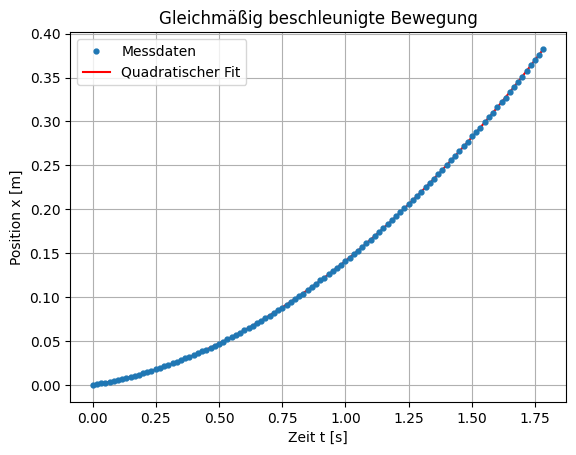

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [ ]:
# robust file parsing: try common separators and handle decimal commas
try:
	df = pd.read_csv("beschleunigt.txt", sep='\t', decimal=',', engine='python')
except Exception:
	df = pd.read_csv("beschleunigt.txt", sep=None, decimal=',', engine='python')

# If header got read as a data row (common when separators are different), promote first row to header
if "t" not in df.columns:
	# try to use the first row as header if it contains the expected names
	first_row = df.iloc[0].astype(str).str.strip().tolist()
	if "t" in first_row or "y" in first_row:
		df.columns = first_row
		df = df[1:].reset_index(drop=True)

# ensure columns are present
if "t" not in df.columns or "y" not in df.columns:
	raise KeyError("Die Datei 'beschleunigt.txt' konnte nicht korrekt eingelesen werden. Erwartete Spalten 't' und 'y' fehlen.")

# convert possible comma decimals and non-numeric entries to floats
df["t"] = pd.to_numeric(df["t"].astype(str).str.replace(",", ".").str.strip(), errors="coerce")
df["y"] = pd.to_numeric(df["y"].astype(str).str.replace(",", ".").str.strip(), errors="coerce")

# drop rows with missing t or y
df = df.dropna(subset=["t", "y"]).reset_index(drop=True)

t = df["t"].to_numpy(dtype=float)
y = df["y"].to_numpy(dtype=float)

# fit a quadratic: y = (a/2) t^2 + v0 t + x0  => poly coeffs correspond to [A, B, C] where A = a/2
coeffs = np.polyfit(t, y, 2)
a = 2 * coeffs[0]
v0 = coeffs[1]
x0 = coeffs[2]

display(Latex((rf"$$a = {a:.2f}\ \mathrm{{m/s^2}} \quad v_0 = {v0:.2f}\ \mathrm{{m/s}} \quad x_0 = {x0:.2f}\ \mathrm{{m}}$$")))

x_fit = np.polyval(coeffs, t)

plt.figure()
plt.plot(t, y, 'o', markersize=3.5, label="Messdaten", zorder=10)
plt.plot(t, x_fit, color="red", label="Quadratischer Fit")
plt.xlabel("Zeit t [s]")
plt.ylabel("Position x [m]")
plt.title("Gleichmäßig beschleunigte Bewegung")
plt.legend()
plt.grid(True)
plt.show()

m1 = 1
m2 = 0.02
F1 = (m1 + m2) * a
F2 = m2 * 9.81
display(Latex((rf"$$F_1 = {F1:.2f}\ \mathrm{{N}} \quad F_2 = {F2:.2f}\ \mathrm{{N}}$$")))
Fr = F2 - F1
Reibungskoeffizient = Fr / (m1 * 9.81)
display(Latex((rf"$$\mu = {Reibungskoeffizient:.4f}$$")))


## Kräftefreie Bewegung

### Grundlagen
Geschwindigkeit eines Punktes am starren Körper: $$\vec{v} = \vec{v}_s + \vec{\omega} \times \vec{r}$$
ist eine Überlagerung der Schwerpunktsbewegung mit der Geschwindigkeit und der Rotation mit der Bahngeschwindigkeit


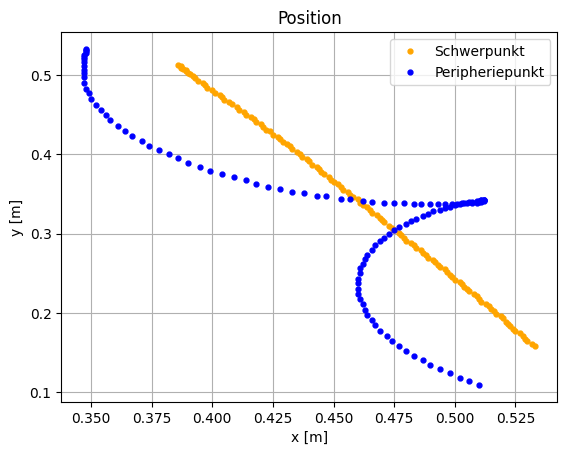

In [20]:
df = pd.read_csv("Schwer-undPeripheriepunkt.txt", sep='\t', decimal=',', engine='python')
xs = df["x"].to_numpy()
ys = df["y"].to_numpy()
xp = df["c"].to_numpy()
yp = df["d"].to_numpy()

plt.figure()
plt.plot(xs, ys, 'o', markersize=3.5, label="Schwerpunkt", color="orange")
plt.plot(xp, yp, 'o', markersize=3.5, label="Peripheriepunkt", color="blue") 
plt.xlabel("x [m]")
plt.ylabel("y [m]")
plt.title("Position")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Load first file with robust parsing
try:
    df1 = pd.read_csv("Schwer-undPeripheriepunkt-1.txt", sep='\t', decimal=',', engine='python')
except Exception:
    df1 = pd.read_csv("Schwer-undPeripheriepunkt-1.txt", sep=None, decimal=',', engine='python')

# Load second file with robust parsing
try:
    df2 = pd.read_csv("Schwer-undPeripheriepunkt2.txt", sep='\t', decimal=',', engine='python')
except Exception:
    df2 = pd.read_csv("Schwer-undPeripheriepunkt2.txt", sep=None, decimal=',', engine='python')

# For both dataframes, if header got read as data row, promote first row to header
for df in [df1, df2]:
    if "x" not in df.columns and "y" not in df.columns:
        first_row = df.iloc[0].astype(str).str.strip().tolist()
        if "x" in first_row or "y" in first_row:
            df.columns = first_row
            df = df[1:].reset_index(drop=True)
            
    # convert columns to numeric, handling possible comma decimals
    df["x"] = pd.to_numeric(df["x"].astype(str).str.replace(",", ".").str.strip(), errors="coerce")
    df["y"] = pd.to_numeric(df["y"].astype(str).str.replace(",", ".").str.strip(), errors="coerce")

xs = df1["x"].to_numpy()
ys = df1["y"].to_numpy()
xp = df2["x"].to_numpy()
yp = df2["y"].to_numpy()


plt.figure()
plt.plot(xs, ys, 'o', markersize=3.5, label="Schwerpunkt", color="orange")
plt.plot(xp, yp, 'o', markersize=3.5, label="Peripheriepunkt", color="blue") 
plt.title("Position")
plt.xlabel("x [m]")
plt.ylabel("y [m]")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
df = pd.read_csv("Schwer-undPeripheriepunkt_geschwindigkeiten.csv")
vxs = df["vs"].to_numpy()
vys = df["ys"].to_numpy()
vxp = df["xp"].to_numpy()
vyp = df["yp"].to_numpy()


plt.figure()
plt.plot(vxs, vys, 'o', markersize=3.5, label="Schwerpunktgeschwindigkeit", color="orange")
plt.plot(vxp, vyp, 'o', markersize=3.5, label="Peripheriegeschwindigkeit", color="blue") 
plt.xlabel("t [s]")
plt.ylabel("v [m/s]")
plt.title("Geschwindigkeit")
plt.legend()
plt.grid(True)
plt.show()



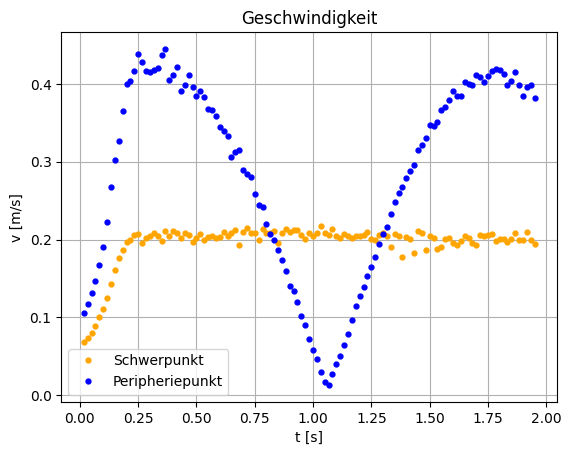

In [ ]:
df = pd.read_csv("Schwer-undPeripheriepunkt.txt", sep='\t', decimal=',', engine='python')
t = df["t"].to_numpy()
vs = df["v"].to_numpy()
vp = df["w"].to_numpy()

plt.figure()
plt.plot(t, vs, 'o', markersize=3.5, label="Schwerpunkt", color="orange")
plt.plot(t, vp, 'o', markersize=3.5, label="Peripheriepunkt", color="blue")
plt.xlabel("t [s]")
plt.ylabel("v [m/s]")
plt.title("Geschwindigkeit")
plt.legend()
plt.grid(True)
plt.show()

In [32]:
x = 0.35
y = 1.8

omega = (2*3.14)/(y - x)

display(Latex((rf"$$\omega = {omega:.4f}\ \mathrm{{rad/s}} $$")))

<IPython.core.display.Latex object>

## Elastischer Stoß

### Grundlagen
Impulserhaltung: Der Gesamtimpuls der beiden Körper ist zeitlich konstant. Somit gilt: 
$$m_1 \vec{v}_1 + m_2 \vec{v}_2 = m_1 \vec{w}_1 + m_2 \vec{w}_2$$

Energiesatz: Bei einem idealen elastischen Stoß bleibt die Gesamtenergie beider Körper erhalten. Es wird keine kinetische Enegie in andere Energieformen umgewandelt. Somit gilt:
$$\frac{m_1 \vec{v}_1^{\,2}}{2} + \frac{m_2 \vec{v}_2^{\,2}}{2} = \frac{m_1 \vec{w}_1^{\,2}}{2} + \frac{m_2 \vec{w}_2^{\,2}}{2}$$

Schwerpunktsatz: Der Schwerpunkt eines abgeschlossenen Systems bewegt sich geradlinig und unabhängig von der Wechselwirkung und der Bewegung beider Körper.


Bahnverlauf des Gleiters und des Schwerpunkts


Impulserhaltungssatz

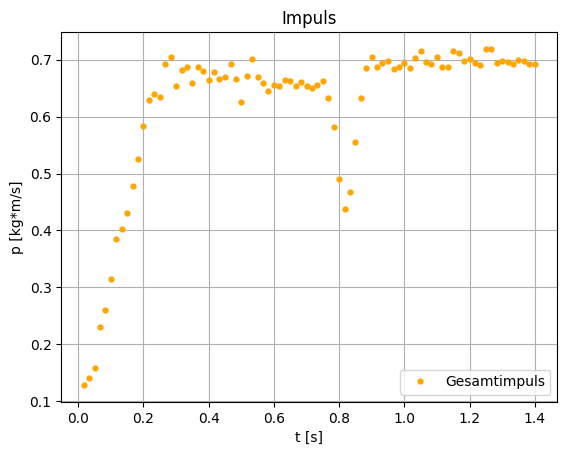

In [48]:
df = pd.read_csv("impuls.txt", sep='\t', decimal=',', engine='python')
xs = df["h"].to_numpy()
xp = df["f"].to_numpy()
t = df["x"].to_numpy()

p = xs + xp

plt.figure()
plt.plot(t, p, 'o', markersize=3.5, label="Gesamtimpuls", color="orange")
plt.xlabel("t [s]")
plt.ylabel("p [kg*m/s]")
plt.title("Impuls")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
df = pd.read_csv("impuls.txt", sep='\t', decimal=',', engine='python')
xs = df["h"].to_numpy()
ys = df["f"].to_numpy()
ys = df[""].to_numpy()

plt.figure()
plt.plot(xs, ys, 'o', markersize=3.5, label="Masse1", color="orange")
plt.plot(xp, yp, 'o', markersize=3.5, label="Masse2", color="blue") 
plt.xlabel("x [m]")
plt.ylabel("y [m]")
plt.title("Position")
plt.legend()
plt.grid(True)
plt.show()


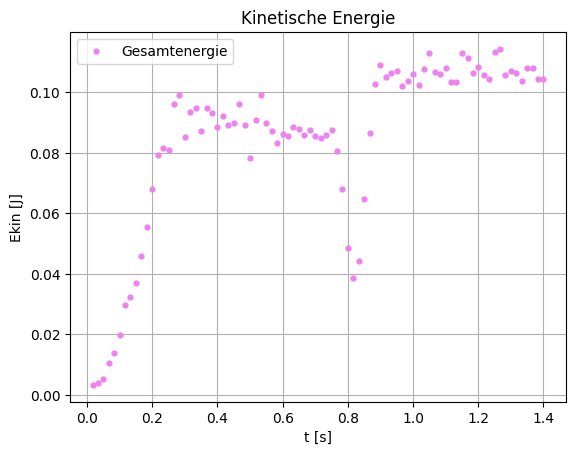

In [50]:
df = pd.read_csv("hallo.txt", sep='\t', decimal=',', engine='python')
xs = df["v"].to_numpy()
xp = df["w"].to_numpy()
m1 = 1.5
m2 = 1

Ev = 0.5 * m1 * xs * xs + 0.5 * m2 * xp * xp

plt.figure()
plt.plot(t, Ev, 'o', markersize=3.5, label="Gesamtenergie", color="violet")
plt.xlabel("t [s]")
plt.ylabel("Ekin [J]")
plt.title("Kinetische Energie")
plt.legend()
plt.grid(True)
plt.show()





## Inelastischer Stoß

### Grundlagen
Bei einem inelastischen Stoß bleiben die beiden Körper nach dem Stoß aneinander hängen und bewegen sich das als ein Körper mit der gleichen Geschwindigkeit weiter: 
$$\vec{w}_1 = \vec{w}_2 = \vec{w}$$

Der Impuls und die Schwerpunktsbewegung werden erhalten. Ein Teil der kinetischen Energie wird in andere Energieformen umgewandelt.

Bahnkurve des Gleiters und des Schwerpunkts

Impulssatz


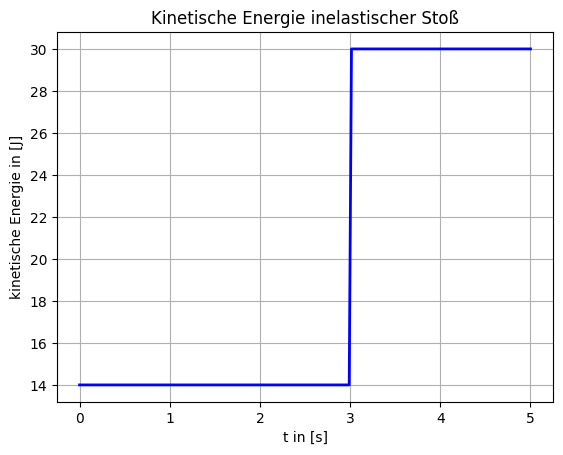

<IPython.core.display.Latex object>

In [ ]:
m1 = 2
m2 = 4
v1 = 7
v2 = 0
v3 = 5

Ev = m1 * v1 + m2 * v2
En = (m1 + m2) * v3

t_s = 3
t = np.linspace(0, 5, 200)
E = np.where(t < t_s, Ev, En)

plt.plot(t, E, 'b', linewidth=2)
plt.xlabel("t in [s]")
plt.ylabel("kinetische Energie in [J]")
plt.title("Kinetische Energie inelastischer Stoß")
plt.grid(True)
plt.show()

display(Latex((rf"$$E_v = {Ev:.2f} J \\ E_n = {En:.2f} J$$")))
